In [1]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.2f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from statsmodels
import statsmodels
import statsmodels.api as sm

# import 'stats'
from scipy import stats

# 'metrics' from sklearn is used for evaluating the model performance
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


# import function to perform linear regression
from sklearn.linear_model import LinearRegression

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

# import SGDRegressor from sklearn to perform linear regression with stochastic gradient descent
from sklearn.linear_model import SGDRegressor

# import function for ridge regression
from sklearn.linear_model import Ridge

# import function for lasso regression
from sklearn.linear_model import Lasso

# import function for elastic net regression
from sklearn.linear_model import ElasticNet

# import function to perform GridSearchCV
from sklearn.model_selection import GridSearchCV

In [2]:
df=pd.read_csv(r"C:\Users\User\Desktop\Los Angels\listings_LA.csv")
df.head(2)

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,109,https://www.airbnb.com/rooms/109,20211102175612,2021-11-03,Amazing bright elegant condo park front *UPGRA...,"*** Unit upgraded with new bamboo flooring, br...",NaN,https://a0.muscache.com/pictures/4321499/1da98...,521,https://www.airbnb.com/users/show/521,Paolo,2008-06-27,"San Francisco, California, United States","Paolo Privitera, CEO Evensi\n\nPaolo, MIT MBA ...",NaN,NaN,NaN,f,https://a0.muscache.com/im/pictures/user/e704a...,https://a0.muscache.com/im/pictures/user/e704a...,Culver City,1.00,1.00,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,NaN,Culver City,Other Cities,33.98,-118.39,Entire condominium (condo),Entire home/apt,6,NaN,2 baths,2.00,3.00,"[""Shampoo"", ""Free parking on premises"", ""Cable...",$115.00,30,730,30.00,30.00,730.00,730.00,30.00,730.00,NaN,t,0,0,0,193,2021-11-03,2,0,0,2011-08-15,2016-05-15,4.00,5.00,5.00,3.00,4.00,5.00,4.00,NaN,f,1,1,0,0,0.02
1,2708,https://www.airbnb.com/rooms/2708,20211102175612,2021-11-03,Runyon Canyon | Beau Furn Mirror Mini-Suite Fi...,"Run Runyon Canyon, Our Gym & Sauna Open <br />...","Walk and run to Runyon Canyon, it is open!<br ...",https://a0.muscache.com/pictures/miso/Hosting-...,3008,https://www.airbnb.com/users/show/3008,Chas.,2008-09-16,"Los Angeles, California, United States",Writer.\r\nLiterary Manager.\r\nPhotographer.\...,within an hour,100%,100%,t,https://a0.muscache.com/im/pictures/user/d17cf...,https://a0.muscache.com/im/pictures/user/d17cf...,Hollywood,2.00,2.00,"['email', 'phone', 'facebook', 'reviews', 'off...",t,t,"Los Angeles, California, United States",Hollywood,City of Los Angeles,34.10,-118.35,Private room in rental unit,Private room,1,NaN,1 shared bath,1.00,1.00,"[""Coffee maker"", ""Shampoo"", ""Free parking on p...",$89.00,30,366,30.00,30.00,1125.00,1125.00,30.00,1125.00,NaN,t,6,7,25,300,2021-11-03,33,6,1,2017-12-29,2021-11-01,4.82,4.79,4.91,5.00,4.97,5.00,4.85,NaN,t,2,0,2,0,0.70


In [3]:
df.shape

(32877, 74)

In [4]:
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_upd

In [5]:
df.dtypes

id                                                int64
listing_url                                      object
scrape_id                                         int64
last_scraped                                     object
name                                             object
description                                      object
neighborhood_overview                            object
picture_url                                      object
host_id                                           int64
host_url                                         object
host_name                                        object
host_since                                       object
host_location                                    object
host_about                                       object
host_response_time                               object
host_response_rate                               object
host_acceptance_rate                             object
host_is_superhost                               

In [6]:
(df.isnull().sum()/len(df))*100

id                                               0.00
listing_url                                      0.00
scrape_id                                        0.00
last_scraped                                     0.00
name                                             0.01
description                                      3.37
neighborhood_overview                           39.30
picture_url                                      0.00
host_id                                          0.00
host_url                                         0.00
host_name                                        0.08
host_since                                       0.08
host_location                                    0.31
host_about                                      40.97
host_response_time                              32.42
host_response_rate                              32.42
host_acceptance_rate                            31.22
host_is_superhost                                0.08
host_thumbnail_url          

In [7]:
df_copy=df.copy()

In [8]:
## Remove special symbol from Price column and convert to numeric dtype

df_copy['price']=df_copy['price'].str.replace('$','').str.replace(',','')
df_copy['price']=df_copy['price'].astype(float)

In [9]:
df_copy.rename(columns = {'host_response_rate':'host_response_rate(in %)','host_acceptance_rate':'host_acceptance_rate(in %)'},
               inplace = True)

In [10]:
## Remove special symbol from host response rate & host acceptance rate column and convert to numeric dtype

df_copy['host_response_rate(in %)']=df_copy['host_response_rate(in %)'].str.replace('%','').str.replace(',','')
df_copy['host_response_rate(in %)']=df_copy['host_response_rate(in %)'].astype(float)

df_copy['host_acceptance_rate(in %)']=df_copy['host_acceptance_rate(in %)'].str.replace('%','').str.replace(',','')
df_copy['host_acceptance_rate(in %)']=df_copy['host_acceptance_rate(in %)'].astype(float)

In [11]:
df_copy['host_response_rate(in %)']=df_copy['host_response_rate(in %)']/100
df_copy['host_acceptance_rate(in %)']=df_copy['host_acceptance_rate(in %)']/100

In [12]:
## Shifting the Price column to last position

first_col=df_copy.pop('price')
df_copy.insert(loc=len(df_copy.columns),column='price',value=first_col)

In [13]:
## Droping columns with 100% nulL values


df_copy=df_copy.drop(['calendar_updated','bathrooms'],axis=1)

In [14]:
(df_copy.isnull().sum()/len(df_copy))*100

id                                              0.00
listing_url                                     0.00
scrape_id                                       0.00
last_scraped                                    0.00
name                                            0.01
description                                     3.37
neighborhood_overview                          39.30
picture_url                                     0.00
host_id                                         0.00
host_url                                        0.00
host_name                                       0.08
host_since                                      0.08
host_location                                   0.31
host_about                                     40.97
host_response_time                             32.42
host_response_rate(in %)                       32.42
host_acceptance_rate(in %)                     31.22
host_is_superhost                               0.08
host_thumbnail_url                            

In [15]:
(df_copy.select_dtypes(include='object')).nunique()

listing_url                     32877
last_scraped                        3
name                            31595
description                     29448
neighborhood_overview           16781
picture_url                     31386
host_url                        18456
host_name                        7097
host_since                       3959
host_location                    1048
host_about                      10298
host_response_time                  4
host_is_superhost                   2
host_thumbnail_url              18308
host_picture_url                18308
host_neighbourhood                587
host_verifications                489
host_has_profile_pic                2
host_identity_verified              2
neighbourhood                     297
neighbourhood_cleansed            265
neighbourhood_group_cleansed        3
property_type                     106
room_type                           4
bathrooms_text                     49
amenities                       30020
has_availabi

In [16]:
## Removing irrelevant 'OBJECT' datatypes


df_copy=df_copy.drop(['listing_url','last_scraped','name','description','neighborhood_overview','picture_url',
                      'host_url','host_name','host_since','host_location','host_about','host_thumbnail_url',
                      'host_picture_url','host_verifications','host_has_profile_pic','host_identity_verified',
                      'calendar_last_scraped','first_review','last_review','license'],axis=1)

In [17]:
(df_copy.select_dtypes(exclude='object')).nunique()

id                                              32877
scrape_id                                           1
host_id                                         18456
host_response_rate(in %)                           70
host_acceptance_rate(in %)                        101
host_listings_count                                96
host_total_listings_count                          96
latitude                                        20485
longitude                                       23395
accommodates                                       17
bedrooms                                           15
beds                                               25
minimum_nights                                     96
maximum_nights                                    260
minimum_minimum_nights                             97
maximum_minimum_nights                            101
minimum_maximum_nights                            234
maximum_maximum_nights                            235
minimum_nights_avg_ntm      

In [18]:
## Removing irrrelevant 'NUMERIC' columns

df_copy=df_copy.drop(['id','scrape_id','host_id'],axis=1)

In [19]:
df_copy.shape

(32877, 49)

In [20]:
na= (df_copy.isnull().sum()/len(df_copy))*100
na[na!=0]

host_response_time            32.42
host_response_rate(in %)      32.42
host_acceptance_rate(in %)    31.22
host_is_superhost              0.08
host_neighbourhood            19.90
host_listings_count            0.08
host_total_listings_count      0.08
neighbourhood                 39.30
bathrooms_text                 0.19
bedrooms                      11.46
beds                           6.19
minimum_minimum_nights         0.01
maximum_minimum_nights         0.01
minimum_maximum_nights         0.01
maximum_maximum_nights         0.01
minimum_nights_avg_ntm         0.01
maximum_nights_avg_ntm         0.01
review_scores_rating          24.09
review_scores_accuracy        25.11
review_scores_cleanliness     25.11
review_scores_checkin         25.14
review_scores_communication   25.11
review_scores_location        25.15
review_scores_value           25.16
reviews_per_month             24.09
dtype: float64

In [21]:
df_copy.nunique()

host_response_time                                  4
host_response_rate(in %)                           70
host_acceptance_rate(in %)                        101
host_is_superhost                                   2
host_neighbourhood                                587
host_listings_count                                96
host_total_listings_count                          96
neighbourhood                                     297
neighbourhood_cleansed                            265
neighbourhood_group_cleansed                        3
latitude                                        20485
longitude                                       23395
property_type                                     106
room_type                                           4
accommodates                                       17
bathrooms_text                                     49
bedrooms                                           15
beds                                               25
amenities                   

In [22]:
df_copy.to_csv(r"C:\Users\User\Desktop\Los Angels\LA1_clean.csv",index=False)

In [23]:
df_copy.dtypes

host_response_time                               object
host_response_rate(in %)                        float64
host_acceptance_rate(in %)                      float64
host_is_superhost                                object
host_neighbourhood                               object
host_listings_count                             float64
host_total_listings_count                       float64
neighbourhood                                    object
neighbourhood_cleansed                           object
neighbourhood_group_cleansed                     object
latitude                                        float64
longitude                                       float64
property_type                                    object
room_type                                        object
accommodates                                      int64
bathrooms_text                                   object
bedrooms                                        float64
beds                                            

## objects

In [24]:
# host_response_time            32.420841
# host_is_superhost              0.079083
# host_neighbourhood            19.898409
# neighbourhood                 39.301031
# bathrooms_text                 0.188582

## Numeric

In [25]:
# host_response_rate(in %)      32.420841
# host_acceptance_rate(in %)    31.222435
# host_listings_count            0.079083
# host_total_listings_count      0.079083
# bedrooms                      11.460900
# beds                           6.186696
# minimum_minimum_nights         0.012167
# maximum_minimum_nights         0.012167
# minimum_maximum_nights         0.012167
# maximum_maximum_nights         0.012167
# minimum_nights_avg_ntm         0.012167
# maximum_nights_avg_ntm         0.012167
# review_scores_rating          24.086748
# review_scores_accuracy        25.111780
# review_scores_cleanliness     25.108739
# review_scores_checkin         25.142197
# review_scores_communication   25.114822
# review_scores_location        25.151322
# review_scores_value           25.157405
# reviews_per_month             24.086748

## Missing Value treatment

In [26]:
df_dummy=df_copy.copy()

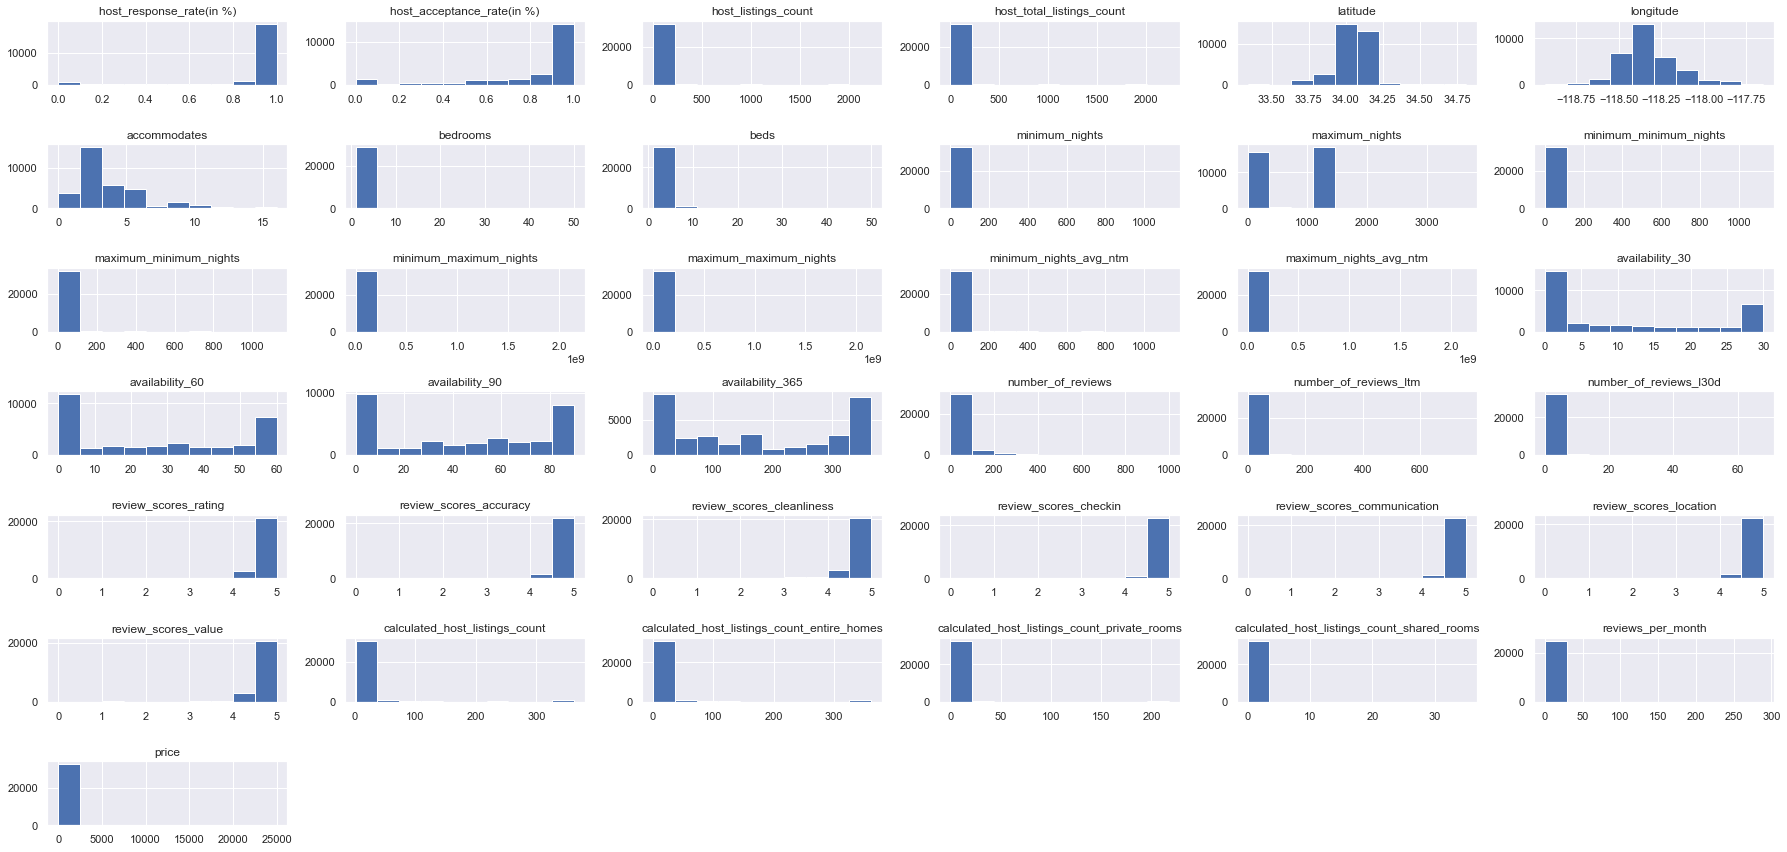

In [27]:
sns. set(font_scale=1) 
df_copy.select_dtypes(exclude=['object']).hist(figsize = (25,12))
plt.tight_layout()
plt.show()

In [28]:
# host_response_rate(in %)      32.420841
# host_acceptance_rate(in %)    31.222435
# host_listings_count            0.079083
# host_total_listings_count      0.079083
# bedrooms                      11.460900
# beds                           6.186696
# minimum_minimum_nights         0.012167
# maximum_minimum_nights         0.012167
# minimum_maximum_nights         0.012167
# maximum_maximum_nights         0.012167
# minimum_nights_avg_ntm         0.012167
# maximum_nights_avg_ntm         0.012167
# review_scores_rating          24.086748
# review_scores_accuracy        25.111780
# review_scores_cleanliness     25.108739
# review_scores_checkin         25.142197
# review_scores_communication   25.114822
# review_scores_location        25.151322
# review_scores_value           25.157405
# reviews_per_month             24.086748

In [29]:
df_dummy.dropna(subset=['host_listings_count','host_total_listings_count','minimum_minimum_nights',
                       'maximum_minimum_nights','minimum_maximum_nights','maximum_maximum_nights','minimum_nights_avg_ntm',
                       'maximum_nights_avg_ntm'],inplace=True)

In [30]:
df_dummy.fillna(df_dummy['host_response_rate(in %)'].median(),inplace=True)
df_dummy.fillna(df_dummy['host_acceptance_rate(in %)'].median(),inplace=True)
df_dummy.fillna(df_dummy['bedrooms'].median(),inplace=True)
df_dummy.fillna(df_dummy['beds'].median(),inplace=True)
df_dummy.fillna(df_dummy['review_scores_rating'].median(),inplace=True)
df_dummy.fillna(df_dummy['review_scores_accuracy'].median(),inplace=True)
df_dummy.fillna(df_dummy['review_scores_cleanliness'].median(),inplace=True)
df_dummy.fillna(df_dummy['review_scores_checkin'].median(),inplace=True)
df_dummy.fillna(df_dummy['review_scores_communication'].median(),inplace=True)
df_dummy.fillna(df_dummy['review_scores_location'].median(),inplace=True)
df_dummy.fillna(df_dummy['review_scores_value'].median(),inplace=True)
df_dummy.fillna(df_dummy['reviews_per_month'].median(),inplace=True)

In [31]:
(df_dummy.isnull().sum()/len(df_dummy))*100

host_response_time                             0.00
host_response_rate(in %)                       0.00
host_acceptance_rate(in %)                     0.00
host_is_superhost                              0.00
host_neighbourhood                             0.00
host_listings_count                            0.00
host_total_listings_count                      0.00
neighbourhood                                  0.00
neighbourhood_cleansed                         0.00
neighbourhood_group_cleansed                   0.00
latitude                                       0.00
longitude                                      0.00
property_type                                  0.00
room_type                                      0.00
accommodates                                   0.00
bathrooms_text                                 0.00
bedrooms                                       0.00
beds                                           0.00
amenities                                      0.00
minimum_nigh

In [32]:
df_dummy.shape

(32847, 49)

# EDA

In [33]:
# Finding the correlation of target variable 'Price' with other numeric variables

df_copy_corr=df_dummy[df_dummy.columns].corr()['price'][:-1]
df_copy_corr.sort_values(ascending=False)


## Bedrooms,accomodates and beds are having significant correlation with price

bedrooms                                        0.40
accommodates                                    0.36
beds                                            0.29
availability_30                                 0.12
availability_60                                 0.10
availability_90                                 0.09
availability_365                                0.07
maximum_nights                                  0.01
latitude                                        0.01
calculated_host_listings_count_entire_homes     0.00
maximum_maximum_nights                          0.00
maximum_nights_avg_ntm                          0.00
minimum_maximum_nights                          0.00
host_response_rate(in %)                       -0.00
host_listings_count                            -0.01
host_total_listings_count                      -0.01
calculated_host_listings_count                 -0.01
minimum_minimum_nights                         -0.01
minimum_nights                                

Entire home/apt    22336
Private room        9610
Shared room          794
Hotel room           107
Name: room_type, dtype: int64


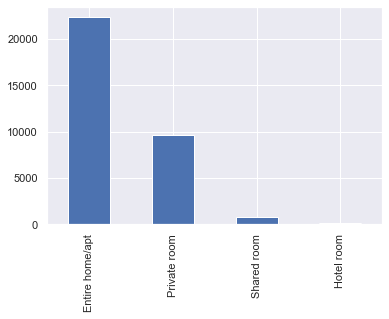

In [34]:
print(df_dummy['room_type'].value_counts())
df_dummy['room_type'].value_counts().plot(kind='bar')
plt.show()

# Entire home/apt type rooms are higher in number than other types

Entire home/apt    8028
Private room       3225
Shared room         256
Hotel room           89
Name: room_type, dtype: int64


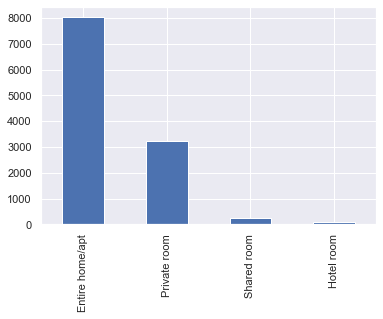

In [35]:
print(df_dummy[df_dummy['instant_bookable']=='t']['room_type'].value_counts())
df_dummy[df_dummy['instant_bookable']=='t']['room_type'].value_counts().plot(kind='bar')
plt.show()

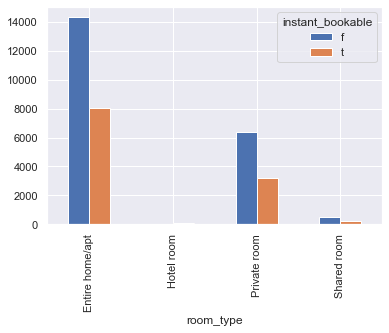

instant_bookable,f,t
room_type,,
Entire home/apt,14308,8028
Hotel room,18,89
Private room,6385,3225
Shared room,538,256


In [36]:
pd.crosstab(df_dummy['room_type'],df_dummy['instant_bookable']).plot(kind='bar')
plt.show()
pd.crosstab(df_dummy['room_type'],df_dummy['instant_bookable'])

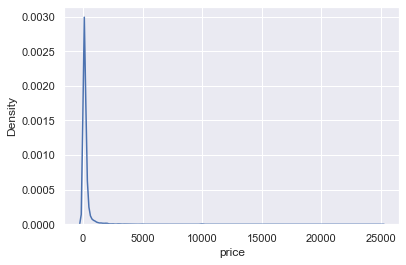

In [37]:
sns.kdeplot(df_dummy['price'])
plt.show()

within an hour        14975
1.0                   10630
within a few hours     3902
within a day           2134
a few days or more     1206
Name: host_response_time, dtype: int64


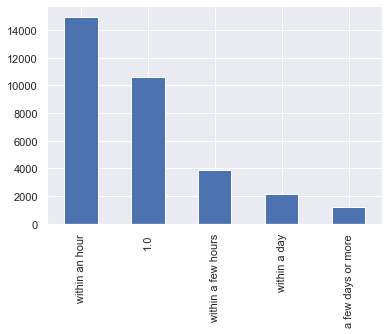

In [38]:
print(df_dummy['host_response_time'].value_counts())
df_dummy['host_response_time'].value_counts().plot(kind='bar')
plt.show()


## Around 46% of hosts respond within an hour

f    22885
t     9962
Name: host_is_superhost, dtype: int64


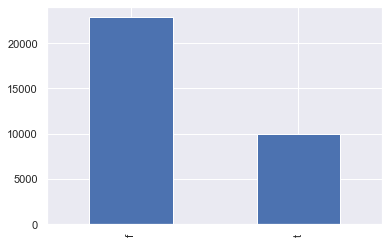

In [39]:
print(df_dummy['host_is_superhost'].value_counts())
df_dummy['host_is_superhost'].value_counts().plot(kind='bar')
plt.show()

## 70% hosts are not superhosts 

In [40]:
df_dummy['number_of_reviews'].nunique()

515

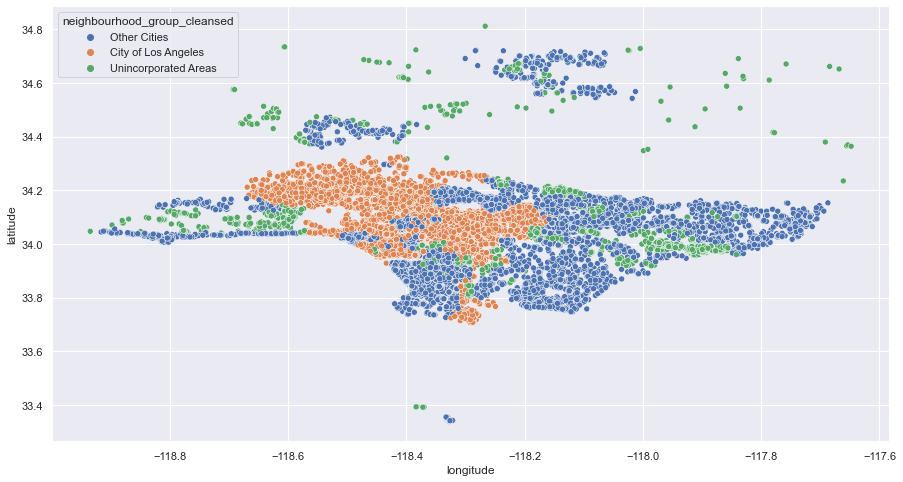

In [41]:
plt.figure(figsize=(15,8))
sns.scatterplot(df_dummy['longitude'],df_dummy['latitude'],hue=df_dummy['neighbourhood_group_cleansed'])
plt.show()

In [42]:
df_dummy.nunique()

host_response_time                                  5
host_response_rate(in %)                           70
host_acceptance_rate(in %)                        101
host_is_superhost                                   2
host_neighbourhood                                588
host_listings_count                                96
host_total_listings_count                          96
neighbourhood                                     298
neighbourhood_cleansed                            265
neighbourhood_group_cleansed                        3
latitude                                        20471
longitude                                       23383
property_type                                     105
room_type                                           4
accommodates                                       17
bathrooms_text                                     50
bedrooms                                           15
beds                                               25
amenities                   

In [43]:
df_dummy.groupby('room_type')[['accommodates','bathrooms_text','bedrooms','beds']].max()

,accommodates,bedrooms,beds
room_type,,,
Entire home/apt,16,13.00,23.00
Hotel room,8,2.00,16.00
Private room,16,50.00,50.00
Shared room,16,1.00,26.00


f    21249
t    11598
Name: instant_bookable, dtype: int64


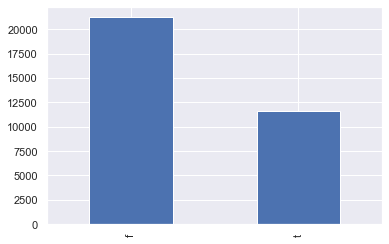

In [44]:
print(df_dummy['instant_bookable'].value_counts())
df_dummy['instant_bookable'].value_counts().plot(kind='bar')
plt.show()

# Only 35% listings can be booked instantly

In [45]:
df_dummy.select_dtypes(include='object').nunique()

host_response_time                  5
host_is_superhost                   2
host_neighbourhood                588
neighbourhood                     298
neighbourhood_cleansed            265
neighbourhood_group_cleansed        3
property_type                     105
room_type                           4
bathrooms_text                     50
amenities                       30009
has_availability                    2
instant_bookable                    2
dtype: int64

t    31885
f      962
Name: has_availability, dtype: int64


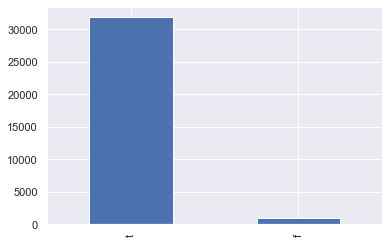

In [46]:
print(df_dummy['has_availability'].value_counts())
df_dummy['has_availability'].value_counts().plot(kind='bar')
plt.show()